In [6]:
# import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import cartopy.crs as ccrs
# import cartopy
import xarray as xr
import xesmf as xe
import ESMF

# HYCOM<sub>CCI</sub> vs HYCOM<sub>FREE</sub> vs CCI SST

In [ ]:
# ds_free = xr.open_dataset('../Data/hycom_free_sst.nc')
# ds_free = ds_free.sel(time=slice('2009-01-01','2014-06-04'))

ds_cci = xr.open_dataset('../Data/hycom_cci_sst.nc')
ds_cci = ds_cci.sel(time=slice('2009-01-01','2014-06-04'))

ds_sst = xr.open_dataset('../Data/cci_sst.nc')
ds_sst = ds_sst.sel(time=slice('2009-01-01','2014-06-04'))
ds_sst['analysed_sst'] = ds_sst['analysed_sst'] - 273.15

# ds_sst_gridded = xr.open_dataset('../Data/CCI_regrid.nc')
# ds_sst_gridded = ds_sst_gridded.sel(time=slice('2009-01-01','2014-06-04'))
# ds_sst_gridded['analysed_sst'] = ds_sst_gridded['analysed_sst'] - 273.15

# diff = ds_cci - ds_free

# Regridding with xESMF

## Build regridder

In [3]:
# outgrid = xr.Dataset({'lat': (['lat'], np.arange(16, 75, 1.0)),'lon': (['lon'], np.arange(200, 330, 1.5)),})
# outgrid = xr.Dataset({'lat': ds_free['latitude'],'lon': ds_free['longitude']})

ds_cci = ds_cci.rename({'latitude': 'lat', 'longitude': 'lon'})

regridder = xe.Regridder(ds_sst, ds_cci, 'bilinear')
regridder.clean_weight_file()
regridder

Create weight file: bilinear_800x1200_444x666.nc
Remove file bilinear_800x1200_444x666.nc


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_800x1200_444x666.nc 
Reuse pre-computed weights? False 
Input grid shape:           (800, 1200) 
Output grid shape:          (444, 666) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [12]:
# ds_cci.to_netcdf('../Data/')

<xarray.Dataset>
Dimensions:      (depth: 1, latitude: 444, longitude: 666, time: 1981)
Coordinates:
  * time         (time) datetime64[ns] 2009-01-01 2009-01-02 ... 2014-06-04
  * longitude    (longitude) float32 0.0 0.09022556 ... 59.909775 60.0
  * latitude     (latitude) float32 -50.0 -49.93051 ... -10.10637 -10.0
  * depth        (depth) float32 0.0
Data variables:
    mercator     int32 ...
    x            (longitude) float32 ...
    y            (latitude) float32 ...
    model_depth  (latitude, longitude) float32 ...
    temperature  (time, depth, latitude, longitude) float32 ...
Attributes:
    title:                     Pilot MyOcean reanalysis by TOPAZ4 (2003-2008)
    institution:               NERSC, Thormoehlens gate 47, N-5006 Bergen, No...
    history:                   Tue Mar 24 14:34:31 2020: ncrcat AGUDAILY_star...
    source:                    NERSC-HYCOM model fields
    references:                http://topaz.nersc.no
    field_type:                Files based on file type nersc_daily
    Conventions:               CF-1.4
    field_date:                2008-12-18
    bulletin_date:             2008-12-18
    NCO:                       4.6.6
    nco_openmp_thread_number:  1

In [ ]:
ds_sst_regridded = regridder(ds_sst)
# ds_sst_regridded

using dimensions ('lat', 'lon') from data variable analysed_sst as the horizontal dimensions for this dataset.


### CCI SST ungridded

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


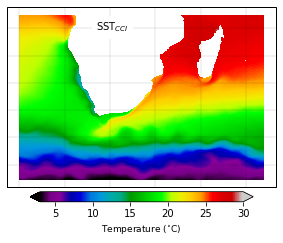

<Figure size 432x288 with 0 Axes>

In [3]:
# proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)
proj = ccrs.PlateCarree()

# plt.figure(figsize=(10,5))
plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)
# ax.set_extent((0,60,-46.85,-10))

img = ds_sst['analysed_sst'].mean('time').plot(ax=ax, transform=ccrs.Mercator(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=3, vmax=30)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'SST$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
# plt.savefig('../Figures/sst/SST_mean_SSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### CCI SST regridded

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


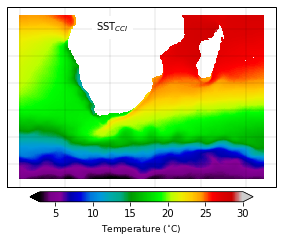

<Figure size 432x288 with 0 Axes>

In [4]:
# proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)
proj = ccrs.PlateCarree()

# plt.figure(figsize=(10,5))
plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)
# ax.set_extent((0,60,-46.85,-10))

img = ds_sst_gridded['analysed_sst'].mean('time').plot(ax=ax, transform=ccrs.Mercator(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=3, vmax=30)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'SST$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
# plt.savefig('../Figures/sst/SST_mean_SSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - HYCOM<sub>FREE</sub>)

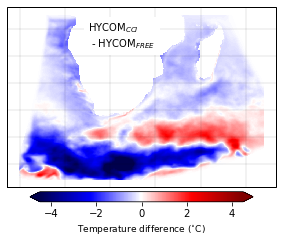

<Figure size 432x288 with 0 Axes>

In [23]:
# proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)
proj = ccrs.PlateCarree()

diff = ds_cci.temperature.mean('time') - ds_free.temperature.mean('time')

# plt.figure(figsize=(10,5))
plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)
# ax.set_extent((0,60,-46.85,-10))

img = diff.plot(ax=ax, transform=ccrs.Mercator(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-4.5, vmax=4.5)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature difference ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.78,'HYCOM$_{CCI}$\n - HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_meandiff_HYCOMcciHYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (CCI SST - HYCOM<sub>CCI</sub>)

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


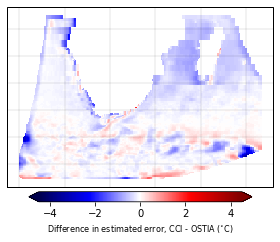

<Figure size 432x288 with 0 Axes>

In [5]:
# proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)
proj = ccrs.PlateCarree()

diff = ds_sst_gridded['analysed_sst'].mean('time') - ds_cci['temperature'].mean('time')

# plt.figure(figsize=(10,5))
plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)
# ax.set_extent((0,60,-46.85,-10))

img = diff.plot(ax=ax, transform=ccrs.Mercator(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-4.5, vmax=4.5)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Difference in estimated error, CCI - OSTIA ($^{\circ}$C)', fontsize=8)
# ax.set_title('Obs error difference (CCI - OSTIA)')
ax.set_title('')
# plt.text(0.27,0.90,'18 December 2008', bbox=dict(facecolor='white', alpha=1), fontsize=8, transform=ax.transAxes)
# plt.savefig('Diff_ObsErr.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### CCI SST

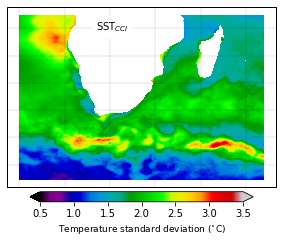

<Figure size 432x288 with 0 Axes>

In [28]:
# proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)
proj = ccrs.PlateCarree()

# plt.figure(figsize=(10,5))
plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)
# ax.set_extent((0,60,-46.85,-10))

img = ds_sst['analysed_sst'].std('time').plot(ax=ax, transform=ccrs.Mercator(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=0.5, vmax=3.5)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature standard deviation ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'SST$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_stdev_SSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - HYCOM<sub>FREE</sub>)

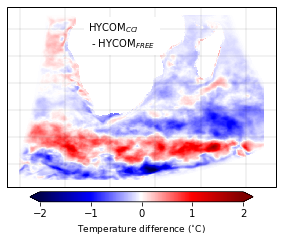

<Figure size 432x288 with 0 Axes>

In [29]:
# proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)
proj = ccrs.PlateCarree()

diff = ds_cci.temperature.std('time') - ds_free.temperature.std('time')

# plt.figure(figsize=(10,5))
plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)
# ax.set_extent((0,60,-46.85,-10))

img = diff.plot(ax=ax, transform=ccrs.Mercator(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-2, vmax=2)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature difference ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.78,'HYCOM$_{CCI}$\n - HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_stdevdiff_HYCOMcciHYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

In [10]:
ds_sst_gridded['longitude']

<xarray.DataArray 'longitude' (longitude: 666)>
array([ 0.      ,  0.090226,  0.180451, ..., 59.819546, 59.90977 , 59.999996],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.09022556 ... 59.90977 59.999996
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [9]:
ds_cci['longitude']

<xarray.DataArray 'longitude' (longitude: 666)>
array([ 0.      ,  0.090226,  0.180451, ..., 59.81955 , 59.909775, 60.      ],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.09022556 0.18045112 ... 59.909775 60.0
Attributes:
    axis:           X
    standard_name:  longitude
    units:          degrees_east